- Reference
  - https://blog.amedama.jp/entry/2019/01/29/235642
  - scikit-learn インターフェース

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
import xgboost as xgb

In [3]:
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [4]:
#dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_test, label=y_test)

In [4]:
# xgb_params = {
#     'objective': 'binary:logistic',
#     'eval_metric': 'logloss',
# }

# evals = [(dtrain, 'train'), (dtest, 'eval')]
# evals_result = {}

# bst = xgb.train(xgb_params,
#                 dtrain,
#                 num_boost_round=1000,
#                 early_stopping_rounds=10,
#                 evals=evals,
#                 evals_result=evals_result)

clf = xgb.XGBClassifier(objective='binary:logistic',
                        n_estimators=1000)

evals_result = {}

clf.fit(X_train,
        y_train,
        eval_metric='logloss',
        eval_set=[
            (X_train, y_train),
            (X_test, y_test),
        ],
        early_stopping_rounds=10,
        callbacks=[
            xgb.callback.record_evaluation(evals_result)
        ],)

[0]	validation_0-logloss:0.46240	validation_1-logloss:0.49290
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.33344	validation_1-logloss:0.37602
[2]	validation_0-logloss:0.24974	validation_1-logloss:0.30837
[3]	validation_0-logloss:0.19168	validation_1-logloss:0.26162
[4]	validation_0-logloss:0.15087	validation_1-logloss:0.22837
[5]	validation_0-logloss:0.12011	validation_1-logloss:0.20208
[6]	validation_0-logloss:0.09615	validation_1-logloss:0.17614
[7]	validation_0-logloss:0.07942	validation_1-logloss:0.16177
[8]	validation_0-logloss:0.06669	validation_1-logloss:0.15044
[9]	validation_0-logloss:0.05665	validation_1-logloss:0.14649
[10]	validation_0-logloss:0.04829	validation_1-logloss:0.13628
[11]	validation_0-logloss:0.04239	validation_1-logloss:0.13244
[12]	validation_0-logloss:0.03736	validation_1-logloss:0.12173
[13]	validation_0-logloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [5]:
# y_pred_proba = bst.predict(dtest)
# y_pred = np.where(y_pred_proba > 0.5, 1, 0)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

Accuracy: 0.9649122807017544


In [8]:
print(evals_result['validation_0']['logloss'][:3])
print(evals_result['validation_1']['logloss'][:3])

[0.462396, 0.33344, 0.249744]
[0.492899, 0.376018, 0.308367]


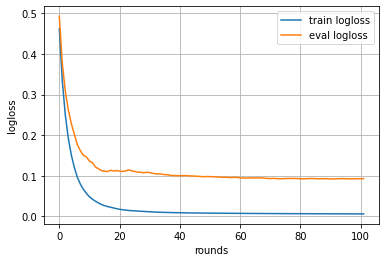

In [9]:
# train_metric = evals_result['train']['logloss']
# plt.plot(train_metric, label='train logloss')
# eval_metric = evals_result['eval']['logloss']
# plt.plot(eval_metric, label='eval logloss')

train_metric = evals_result['validation_0']['logloss']
plt.plot(train_metric, label='train logloss')

eval_metric = evals_result['validation_1']['logloss']
plt.plot(eval_metric, label='eval logloss')
    
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('logloss')
plt.show()